# Pandas

* memory usage of Parquet read in Pandas as Arrow or NumPy arrays
  * 2021+ 11GB 6s as Arrow
  * 2021+ 39GB 16s at NumPy

In [1]:
import pandas as pd
import polars as pl
from humanfriendly import format_size, format_number
from simpler_mpl import set_commas, set_common_mpl_styles
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

import datetime, os
display(f"Pandas {pd.__version__}, Polars {pl.__version__}")
display(f'Running: {datetime.datetime.now().strftime("%Y%m%d %H:%M:%S")}, env {os.getenv("CONDA_DEFAULT_ENV")}')

%load_ext ipython_memory_usage
%imu_start

def show_rows_memory(df, deep=False):
    """
    Show rows and memory cost of a Pandas/Polars dataframe
    `deep=True` only has an impact on Pandas numpy-backed string columns, which otherwise are undercounted
    """
    num_bytes = 0
    df_type = "Unknown"
    try:
        num_bytes = df.estimated_size()  # try Polars
        df_type = "Polars"
    except AttributeError:
        pass
    try:
        num_bytes = df.memory_usage(deep=deep, index=False).sum()  # try Pandas
        df_type = "Pandas"
    except AttributeError:
        pass
    display(
        f"{df_type} df with {format_number(df.shape[0])} rows, {format_size(num_bytes)} bytes"
    )

'Pandas 2.1.3, Polars 0.19.17'

'Running: 20231205 12:00:31, env pydataglobal2023'

Enabling IPython Memory Usage, use %imu_start to begin, %imu_stop to end
In [1] used 0.2 MiB RAM in 0.18s (system mean cpu 0%, single max cpu 0%), peaked 0.0 MiB above final usage, current RAM usage now 212.2 MiB


In [2]:
dfpda = pd.read_parquet("../test_result_2021on.parquet", 
                        dtype_backend="pyarrow")

In [2] used 12986.9 MiB RAM in 4.04s (system mean cpu 83%, single max cpu 100%), peaked 2532.4 MiB above final usage, current RAM usage now 13199.1 MiB


In [3]:
show_rows_memory(dfpda)

'Pandas df with 82,012,245 rows, 11.19 GB bytes'

In [3] used -119.6 MiB RAM in 1.32s (system mean cpu 10%, single max cpu 58%), peaked 0.0 MiB above final usage, current RAM usage now 13079.5 MiB


In [4]:
dfpda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82012245 entries, 0 to 82012244
Data columns (total 14 columns):
 #   Column             Dtype                 
---  ------             -----                 
 0   test_id            int64[pyarrow]        
 1   vehicle_id         int64[pyarrow]        
 2   test_date          timestamp[us][pyarrow]
 3   test_class_id      int64[pyarrow]        
 4   test_type          large_string[pyarrow] 
 5   test_result        large_string[pyarrow] 
 6   test_mileage       int64[pyarrow]        
 7   postcode_area      large_string[pyarrow] 
 8   make               large_string[pyarrow] 
 9   model              large_string[pyarrow] 
 10  colour             large_string[pyarrow] 
 11  fuel_type          large_string[pyarrow] 
 12  cylinder_capacity  int64[pyarrow]        
 13  first_use_date     timestamp[us][pyarrow]
dtypes: int64[pyarrow](5), large_string[pyarrow](7), timestamp[us][pyarrow](2)
memory usage: 10.4 GB
In [4] used -12.1 MiB RAM in 1.3

In [5]:
dfpdn = pd.read_parquet("../test_result_2021on.parquet", 
                        dtype_backend="numpy_nullable")

In [5] used 21892.7 MiB RAM in 17.23s (system mean cpu 50%, single max cpu 100%), peaked 1651.3 MiB above final usage, current RAM usage now 34960.2 MiB


In [6]:
show_rows_memory(dfpdn, deep=True)

'Pandas df with 82,012,245 rows, 39.66 GB bytes'

In [6] used -11260.1 MiB RAM in 58.58s (system mean cpu 11%, single max cpu 34%), peaked 0.0 MiB above final usage, current RAM usage now 23700.1 MiB


In [7]:
dfpdn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82012245 entries, 0 to 82012244
Data columns (total 14 columns):
 #   Column             Dtype         
---  ------             -----         
 0   test_id            Int64         
 1   vehicle_id         Int64         
 2   test_date          datetime64[us]
 3   test_class_id      Int64         
 4   test_type          object        
 5   test_result        object        
 6   test_mileage       Int64         
 7   postcode_area      object        
 8   make               object        
 9   model              object        
 10  colour             object        
 11  fuel_type          object        
 12  cylinder_capacity  Int64         
 13  first_use_date     datetime64[us]
dtypes: Int64(5), datetime64[us](2), object(7)
memory usage: 8.9+ GB
In [7] used 0.0 MiB RAM in 0.10s (system mean cpu 0%, single max cpu 0%), peaked 0.0 MiB above final usage, current RAM usage now 23700.1 MiB


In [8]:
# /tmp/ipykernel_585982/2566587885.py:1: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
#dfpda.query('(test_mileage==171443) & (model=="V50") & (test_result=="P") & ', engine="python")
cols = ['test_date', 'test_class_id', 'test_type', 'test_result', 'test_mileage', 'make', 'model', 'colour', 'fuel_type', 'cylinder_capacity', 'first_use_date']
#dfpda.query('(test_id=="642012593")')[cols] # Ian's volvo v50
dfpda.query('(test_mileage==171443) & (model=="V50") & (colour=="BLUE")', engine='python')[cols] # Ian's volvo v50

,test_date,test_class_id,test_type,test_result,test_mileage,make,model,colour,fuel_type,cylinder_capacity,first_use_date
14852857,2022-05-12 00:00:00,4,NT,F,171443,VOLVO,V50,BLUE,DI,1997,2005-03-10 00:00:00
14905227,2022-05-12 00:00:00,4,RT,P,171443,VOLVO,V50,BLUE,DI,1997,2005-03-10 00:00:00


In [8] used 626.2 MiB RAM in 7.95s (system mean cpu 11%, single max cpu 100%), peaked 1487.3 MiB above final usage, current RAM usage now 24326.3 MiB


# Speed test

In [9]:
%imu_stop

'IPython Memory Usage stopped'

### Benchmark groupby between them

* `dfpda.groupby('test_result')['test_mileage'].mean()` - no diff (similar with `fuel_type`)
* `dfpda.groupby('cylinder_capacity')['test_mileage'].mean()` - arrow 2x slower

In [10]:
%timeit dfpdn.groupby('cylinder_capacity')['test_mileage'].mean()

1.07 s ± 31 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
%timeit dfpda.groupby('cylinder_capacity')['test_mileage'].mean()

2.46 s ± 84.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### str benchmark

In [12]:
%timeit dfpda['make'].str.len()
# e.g. TOYOTA, VOLKSWAGEN

1.01 s ± 38.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
%timeit dfpdn['make'].str.len()

7.5 s ± 29.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
%timeit dfpda['test_class_id'].max()

107 ms ± 11.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [15]:
%timeit dfpdn['test_class_id'].max()

224 ms ± 21.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
import numpy as np

np.testing.assert_approx_equal(74115.13, dfpda["test_mileage"].mean())
np.testing.assert_approx_equal(74115.13, dfpdn["test_mileage"].mean())

In [17]:
%timeit dfpda['test_mileage'].mean()

107 ms ± 3.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [18]:
%timeit dfpdn['test_mileage'].mean()

186 ms ± 14.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [19]:
# IAN IS IT SANE TO TEST THE TIME OF 2 OPS - I REALLY NEED TO SEPARATE THESE...
# %timeit dfpda['test_mileage'].dropna().mean()

In [20]:
# %timeit dfpdn['test_mileage'].dropna().mean()

# Mileage vs first use year

### Subsample using NumPy and Arrow

**TODO**

In [21]:
%imu_start

'IPython Memory Usage started'

In [21] used 1.2 MiB RAM in 131.32s (system mean cpu 10%, single max cpu 100%), peaked 1986.6 MiB above final usage, current RAM usage now 24327.5 MiB


In [22]:
# df_fuel = dfpda[:10000].query('test_result=="P"')
# df_fuel = dfpda.query('test_result=="P"').sample(10_000)

In [22] used 0.0 MiB RAM in 0.10s (system mean cpu 10%, single max cpu 40%), peaked 0.0 MiB above final usage, current RAM usage now 24327.5 MiB


## How to get the rows and columns needed?

* query on test result is very slow
* mask on the same logical query is faster
* making the mask is very fast
* selecting rows then selecting columns is slow
* selecting subset of columns then applying mask is very fast

In [23]:
%time dfpda.query('test_result=="P"');

CPU times: user 10.3 s, sys: 6.49 s, total: 16.8 s
Wall time: 16.4 s
In [23] used 0.6 MiB RAM in 16.78s (system mean cpu 13%, single max cpu 100%), peaked 9757.2 MiB above final usage, current RAM usage now 24328.1 MiB


In [24]:
%%time
# similar results CoW enabled and disabled
with pd.option_context("mode.copy_on_write", True):
    dfpda.query('test_result=="P"');

CPU times: user 9.84 s, sys: 6.65 s, total: 16.5 s
Wall time: 16.2 s
In [24] used -0.2 MiB RAM in 16.32s (system mean cpu 10%, single max cpu 100%), peaked 9818.8 MiB above final usage, current RAM usage now 24327.9 MiB


In [25]:
# sanity check they're installed - they are
import bottleneck
import numexpr

In [25] used 0.0 MiB RAM in 0.10s (system mean cpu 0%, single max cpu 0%), peaked 0.0 MiB above final usage, current RAM usage now 24327.9 MiB


Note if rerun out of order when machine is cooler, it still takes 15s

In [52]:
%time dfpda.query('test_result=="P"');

CPU times: user 9.46 s, sys: 6.06 s, total: 15.5 s
Wall time: 15.3 s
In [52] used -1.2 MiB RAM in 15.66s (system mean cpu 10%, single max cpu 100%), peaked 9705.4 MiB above final usage, current RAM usage now 24350.0 MiB


In [27]:
%time dfpda.eval('test_result=="P"'); 
# make mask with eval

CPU times: user 1.43 s, sys: 306 ms, total: 1.74 s
Wall time: 1.55 s
In [27] used 0.1 MiB RAM in 1.65s (system mean cpu 13%, single max cpu 100%), peaked 1357.8 MiB above final usage, current RAM usage now 24328.0 MiB


In [28]:
%%time 
pass_mask = dfpda["test_result"] == "P"; 
# make mask only

CPU times: user 475 ms, sys: 157 µs, total: 475 ms
Wall time: 470 ms
In [28] used 19.4 MiB RAM in 0.57s (system mean cpu 9%, single max cpu 100%), peaked 0.0 MiB above final usage, current RAM usage now 24347.4 MiB


In [29]:
%time dfpda[pass_mask]; 
# select all columns against mask

CPU times: user 8.57 s, sys: 6.08 s, total: 14.7 s
Wall time: 14.4 s
In [29] used 0.2 MiB RAM in 14.81s (system mean cpu 10%, single max cpu 100%), peaked 9828.8 MiB above final usage, current RAM usage now 24347.6 MiB


In [30]:
%%time
cols = ["test_mileage", "fuel_type", 
        "first_use_date"] 
dfpda[pass_mask][cols]; 
# select all columns after mask
# NOTE RUNNING WHEN COOLER (BY HAND), was 64C package by end of run, now 47C takes 11s not 15s, then 54C take 12s

CPU times: user 8.11 s, sys: 6.21 s, total: 14.3 s
Wall time: 14.2 s
In [30] used 0.1 MiB RAM in 14.39s (system mean cpu 9%, single max cpu 100%), peaked 9794.4 MiB above final usage, current RAM usage now 24347.7 MiB


In [31]:
%%time
cols = ["test_mileage", "fuel_type", 
        "first_use_date"] 
dfpda[pass_mask][cols]; 
# select all columns after mask

CPU times: user 8.08 s, sys: 6.22 s, total: 14.3 s
Wall time: 14.2 s
In [31] used 0.0 MiB RAM in 14.38s (system mean cpu 10%, single max cpu 100%), peaked 9816.4 MiB above final usage, current RAM usage now 24347.7 MiB


In [32]:
%time dfpda[cols][pass_mask]; 
# select all columns before mask
# NOTE RUNNING WHEN COOLER (BY HAND), was 64C package by end of run, now 50C takes 3.1s not 3.6s

CPU times: user 2.12 s, sys: 1.3 s, total: 3.42 s
Wall time: 3.4 s
In [32] used 0.0 MiB RAM in 3.57s (system mean cpu 10%, single max cpu 100%), peaked 3139.7 MiB above final usage, current RAM usage now 24347.7 MiB


In [33]:
%time dfpda[cols][pass_mask]; 
# select all columns before mask

CPU times: user 2.09 s, sys: 1.31 s, total: 3.4 s
Wall time: 3.38 s
In [33] used -0.0 MiB RAM in 3.55s (system mean cpu 10%, single max cpu 100%), peaked 3172.2 MiB above final usage, current RAM usage now 24347.6 MiB


In [34]:
%time dfpda[cols][pass_mask]; 
# select all columns before mask

CPU times: user 2.11 s, sys: 1.29 s, total: 3.4 s
Wall time: 3.38 s
In [34] used -0.1 MiB RAM in 3.55s (system mean cpu 10%, single max cpu 100%), peaked 3170.0 MiB above final usage, current RAM usage now 24347.5 MiB


In [35]:
%time dfpda[cols][pass_mask]; 
# select all columns before mask

CPU times: user 1.95 s, sys: 1.42 s, total: 3.37 s
Wall time: 3.35 s
In [35] used 0.0 MiB RAM in 3.52s (system mean cpu 10%, single max cpu 100%), peaked 3216.5 MiB above final usage, current RAM usage now 24347.5 MiB


In [36]:
%time dfpda[dfpda["test_result"] == "P"];

CPU times: user 8.68 s, sys: 5.91 s, total: 14.6 s
Wall time: 14.5 s
In [36] used 0.2 MiB RAM in 14.88s (system mean cpu 10%, single max cpu 100%), peaked 9836.1 MiB above final usage, current RAM usage now 24347.7 MiB


In [37]:
%%time
df_fuel = dfpda.query('test_result=="P"').sample(10_000)

CPU times: user 12.1 s, sys: 6.37 s, total: 18.5 s
Wall time: 18.2 s
In [37] used 1.7 MiB RAM in 18.30s (system mean cpu 10%, single max cpu 100%), peaked 9680.4 MiB above final usage, current RAM usage now 24349.4 MiB


## The actual "work" is fast for pandas and polars

In [38]:
%%time
df_fuel = (
    df_fuel.assign(first_use_year=lambda dfx: dfx["first_use_date"].dt.year)[
        ["test_mileage", "fuel_type", "first_use_year"]
    ]
    .dropna()
    .query("fuel_type in ['PE', 'DI']")
)

CPU times: user 5.72 ms, sys: 504 µs, total: 6.22 ms
Wall time: 5.49 ms
In [38] used 0.5 MiB RAM in 0.11s (system mean cpu 14%, single max cpu 100%), peaked 0.0 MiB above final usage, current RAM usage now 24349.9 MiB


Note on one run when warm it reported 20s, +9.8GB peak, same when cold

In [39]:
%%time
df_fuel = (
    dfpda.query('test_result=="P"')
    .sample(10_000)
    .assign(first_use_year=lambda dfx: dfx["first_use_date"].dt.year)[
        ["test_mileage", "fuel_type", "first_use_year"]
    ]
    .dropna()
    .query("fuel_type in ['PE', 'DI']")
)

CPU times: user 12.9 s, sys: 6.72 s, total: 19.6 s
Wall time: 19.2 s
In [39] used -0.5 MiB RAM in 19.28s (system mean cpu 11%, single max cpu 100%), peaked 9721.6 MiB above final usage, current RAM usage now 24349.4 MiB


In [40]:
# def add_year(dfx):
#    dfx['first_use_year'] = dfx['first_use_date'].dt.year
#    return dfx
# df_fuel = df_fuel.pipe(add_year)[['test_mileage', 'fuel_type', 'first_use_year']]. \

In [40] used 0.0 MiB RAM in 0.10s (system mean cpu 9%, single max cpu 40%), peaked 0.0 MiB above final usage, current RAM usage now 24349.4 MiB


In [41]:
# dfs_allfuel = dfpda.query('test_result=="P"').sample(10_000)
# dfs_allfuel['first_use_year'] = dfs_allfuel['first_use_date'].dt.year
# dfs_allfuel = dfs_allfuel[['test_mileage', 'fuel_type', 'first_use_year']]
# dfs_allfuel = dfs_allfuel.dropna() # some of the test_mileage rows are empty
# df_fuel = dfs_allfuel[dfs_allfuel['fuel_type'].isin(['PE', 'DI'])]

In [41] used 0.0 MiB RAM in 0.10s (system mean cpu 11%, single max cpu 50%), peaked 0.0 MiB above final usage, current RAM usage now 24349.4 MiB


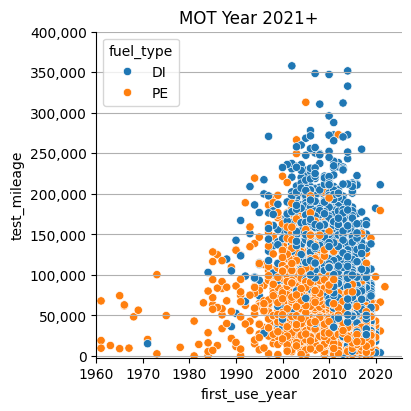

In [42] used 1.8 MiB RAM in 0.55s (system mean cpu 16%, single max cpu 100%), peaked 0.0 MiB above final usage, current RAM usage now 24351.1 MiB


In [42]:
fig, ax = plt.subplots(constrained_layout=True, figsize=(4, 4))
# Note this is Pandas Arrow with Seaborn
# TODO maybe different symbols
# h/t https://stackoverflow.com/questions/56394204/pandas-groupby-scatter-plot-in-a-single-plot for categorical solution
# sns.scatterplot(x=dfs['first_use_year'], y=dfs['test_mileage'], c=pd.Categorical(dfs['fuel_type']).codes, ax=ax)
sns.scatterplot(
    x=df_fuel["first_use_year"],
    y=df_fuel["test_mileage"],
    hue=df_fuel["fuel_type"],
    hue_order=["DI", "PE"],
    ax=ax,
)
# ax.scatter(x=dfs['first_use_year'], y=dfs['test_mileage'], c=pd.Categorical(dfs['fuel_type']).codes,)
ax.set_xlim(xmin=1960)
ax.set_ylim(ymax=400000)
set_commas(ax, y_axis=True)
set_common_mpl_styles(ax, ymin=-2000, title="MOT Year 2021+")

In [43]:
# dfs.info()

In [43] used 0.0 MiB RAM in 0.10s (system mean cpu 13%, single max cpu 50%), peaked 0.0 MiB above final usage, current RAM usage now 24351.1 MiB
